<a href="https://colab.research.google.com/github/OlegTkhor/sudoku/blob/main/Sudoku_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Sequential
from tensorflow.keras.layers import Conv2D, Activation, Flatten, MaxPooling2D, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.layers import RandomTranslation, RandomZoom


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

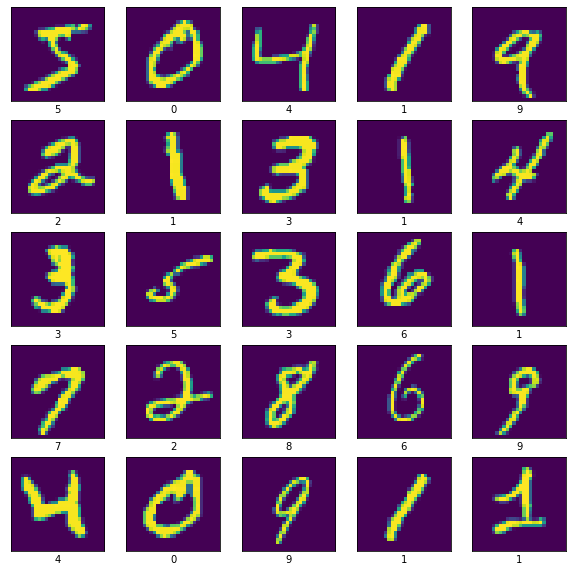

In [3]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [4]:
X = train_images

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
X = X.reshape(60000, 28, 28, 1)


In [84]:
model = Sequential()

model.add(tf.keras.Sequential([
  RandomTranslation(
      height_factor=.1,
      width_factor =.1,
      fill_mode="nearest"
      )
]))
model.add(tf.keras.Sequential([RandomZoom(height_factor=0.2,)]))
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, train_labels, batch_size=128, epochs=3)

Epoch 1/3
469/469 [==============================] - 42s 88ms/step - loss: 0.4774 - accuracy: 0.8508
Epoch 2/3
469/469 [==============================] - 42s 89ms/step - loss: 0.1754 - accuracy: 0.9473
Epoch 3/3
469/469 [==============================] - 42s 89ms/step - loss: 0.1334 - accuracy: 0.9600


In [85]:
val_loss, val_acc = model.evaluate(test_images.reshape(10000,28,28,1), test_labels)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

313/313 [==============================] - 2s 7ms/step - loss: 0.0455 - accuracy: 0.9861
0.04549743980169296
0.9861000180244446


2


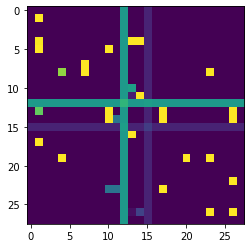

In [89]:
import cv2
img = cv2.imread('/content/sample_data/sudoku.png')
#img = cv2.imread('/content/sample_data/sudoku2.png')
#img = cv2.imread('/content/sample_data/Sudoku3.png')

img = ~img
roi = img
try:
  roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
  roi = roi/255
  roi = cv2.resize(roi, (28,28))
except:
  pass

plt.imshow(roi)
result = model.predict(roi.reshape(1,28,28,1))
print(np.argmax(result))

1.0

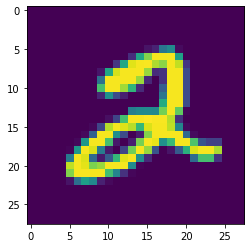

In [87]:
test = X[5]
result = model.predict(test.reshape(1,28,28,1))

plt.imshow(test.reshape(28,28))
np.max(test)

<Figure size 1080x1080 with 0 Axes>

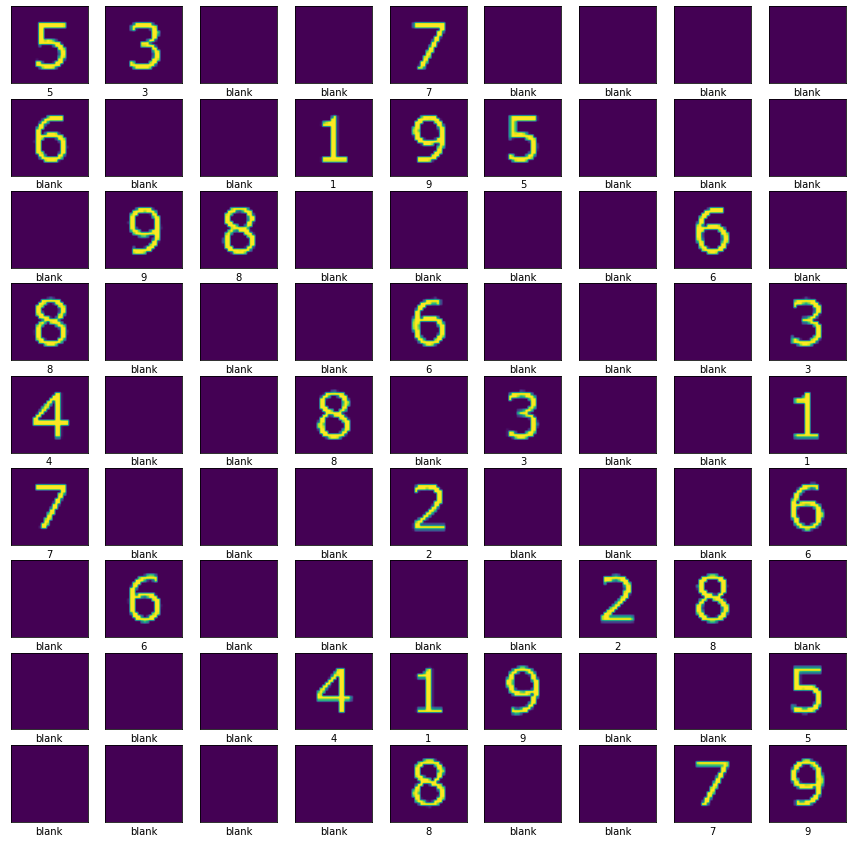

In [90]:
gap = 5
height, width, _ = img.shape
height /= 9
width /= 9
pictures = []
labels_p = []
plt.figure(figsize=(15,15))
for i in range(9):
  for j in range(9):
    roi = img[int(i*height)+gap : int((i+1)*height)-gap, 
              int(j*width)+gap : int((j+1)*width)-gap]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = roi/255
    roi = cv2.resize(roi, (28,28))
    pictures.append(roi)
    result = model.predict(roi.reshape(1,28,28,1))
    if np.max(result) >=.6:
      labels_p.append(np.argmax(result))
    else:
      labels_p.append('blank')

plt.figure(figsize=(15,15))
for i in range(81):
    plt.subplot(9,9,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(pictures[i])
    
    plt.xlabel(labels_p[i])
plt.show()

  